# Data preprocessing
- Removing and imputting missing values
- Getting Categorical data into shape
- Selecting relevant features

# Dealing with missing data

In [44]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,
'''
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))

In [45]:
df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [46]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [47]:
# drop all na
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [48]:
# drop vertically
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [49]:
# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [50]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [51]:
# only drop rows where NaN appear in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


# Imputing missing values

In [52]:
# mean imputation
from sklearn.preprocessing import Imputer
# axis 0, vertical, column mean
# can also use median / most_frequent
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)

imr = imr.fit(df)
imputed_data = imr.transform(df.values)

imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

# Scikit learn estimator API
Imputer belongs to transformer class

- fit 
- transform



# Handling categorical data

Nominal 
- don't imply any order
- T shirt color

Ordinal 
- categorical values that can be sorted / ordered 
- T shirt size

In [53]:
# create a new df
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [54]:
# color - nominal
# size - ordinal
# price - numerical
# class labels 

# Mapping ordinal features
convert categorical string values into integers

In [55]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# Encoding class labels
class labels are not ordinal

In [56]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [57]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [58]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [59]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [60]:
class_le.inverse_transform(y)

array([0, 1, 0])

# Performing one-hot encoding on nominal features

sklearn label encoder encode string label without any order

In [61]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

# The problem is green is not larger than blue
need to use one hot encoding

create dummy feature for each unique value in the nominal feature column

return a sparse matrix

In [62]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()
# return numpy to array for visualization

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [63]:
# One hot encoding too
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# Partioning a dataset in training and test sets

In [89]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
X_train.shape

(124, 13)

# Brining features onto the same scale
feature scaling  
- normalization

rescaling the features to a range of [0,1], min max scaling

- standardization

more practical , linear model (logistic / SVM) initialize weight to 0 or random values close to 0

centre feature at mean 0 with sd 1

easier to learn the weights

maintains useful information about outlier 

makes algorithm less sensitve

- except decision trees and forests

In [92]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [93]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

overfitting = training set much better than test set

high variance

- collect more training data
- Introduce a penalty for complexity
- Choose simpler model with fewer parameters
- Reduce the dimensionality of data

# Sparse solutions with L1 regularization

L1 yields sparse feature vectors, most feature weights will be zero

Sparsity can be useful in high dimensional with irrelevant data 
especially when more irrelevant dimensions than samples
act as feature selection

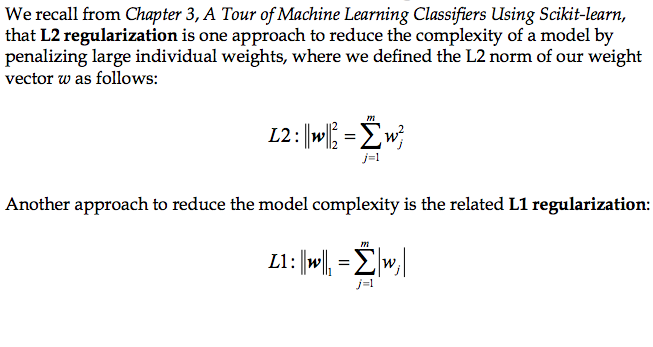

In [69]:
from IPython.display import Image
from IPython.display import display
Image(filename='Screen Shot 2017-12-26 at 11.49.03 PM.png', width=600)

# L2 

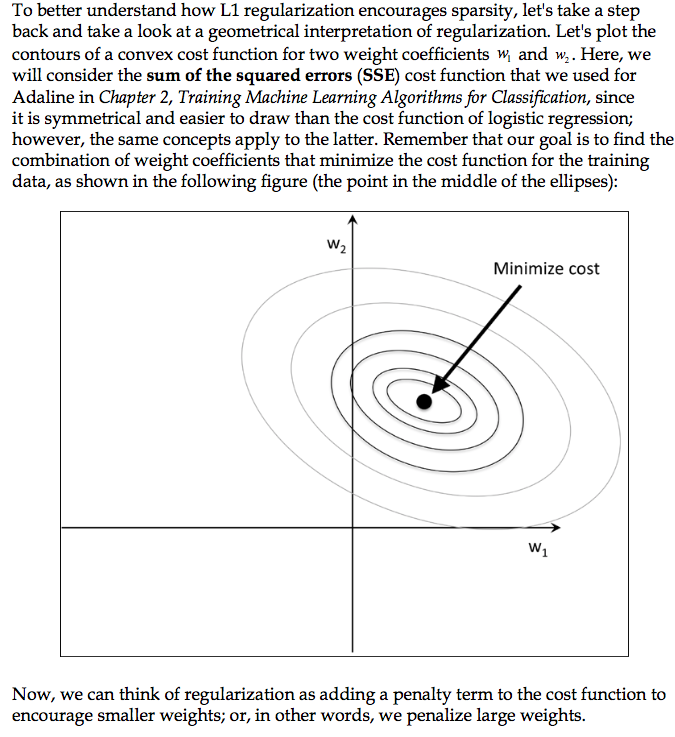

In [70]:
Image(filename='Screen Shot 2017-12-26 at 11.53.54 PM.png', width=600)

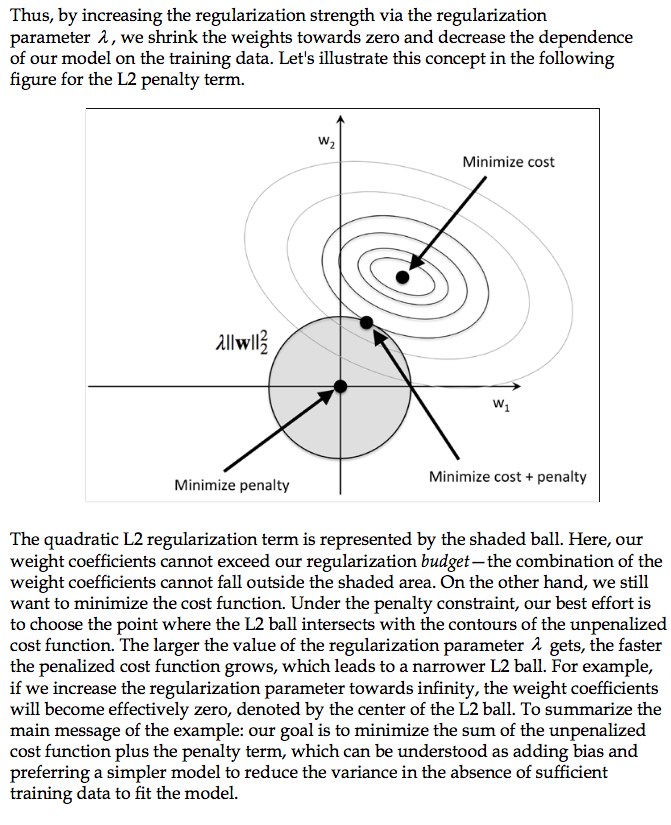

In [71]:
Image(filename='Screen Shot 2017-12-26 at 11.54.31 PM.png', width=600)

weight coefficient cannot exceed regularization budget

larger lamdbda = faster penalized cost grows = narrower L2 Ball

minimize (unpenalized cost function + penalty)

adding bias and preferring simpler model to reduce variance

# L1

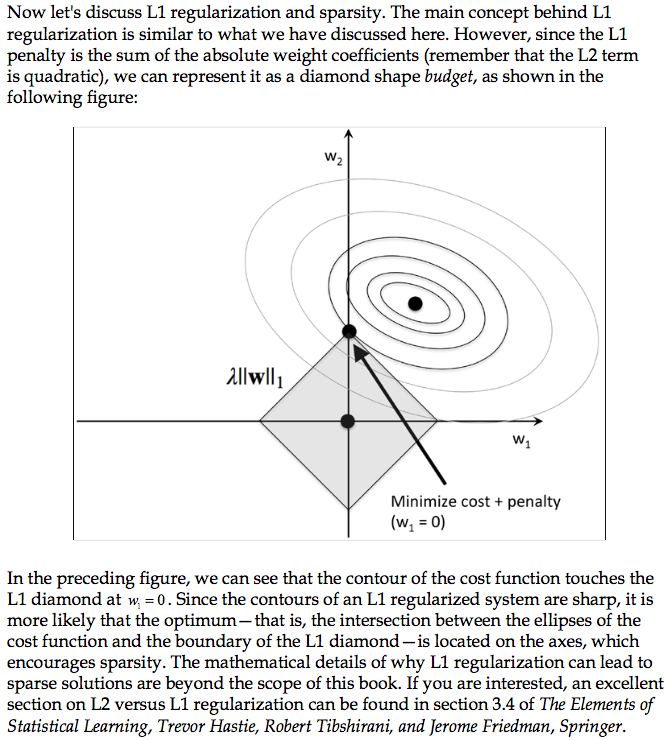

In [72]:
Image(filename='Screen Shot 2017-12-26 at 11.58.42 PM.png', width=600)

# Contours of L1 regularization are sharp, 
more likely that the optimum (intersection between cllipses and boundary) is on the axes

encourages sparsity

In [73]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
# C = regularization rate, smaller = stronger
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


In [74]:
# both 98% = no overfitting
# Logistic regression = one vs rest approach

# class 1 vs class 2 & 3
# class 2 vs class 1 & 3
# class 3 vs class 1 & 2

lr.intercept_

array([-0.38375121, -0.15811918, -0.7004526 ])

In [75]:
# 3 rows of weight coefficient
# 1 weight vector for each class
# each row = 13 weights = weight x features 

# wegith vectors are sparse (few non zero entries)
# because L1 regularization serves as a method for feature selection


lr.coef_

array([[ 0.2800498 ,  0.        ,  0.        , -0.02794487,  0.        ,
         0.        ,  0.71001019,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23662387],
       [-0.64375931, -0.06891704, -0.0571837 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92710012,
         0.05990496,  0.        , -0.37103789],
       [ 0.        ,  0.06150346,  0.        ,  0.        ,  0.        ,
         0.        , -0.63562754,  0.        ,  0.        ,  0.49788962,
        -0.35832639, -0.57174109,  0.        ]])

In [76]:
# plot a regularization strength

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray','indigo','orange']
weights, params = [], []


In [77]:
print (np.arange(-4.0, 6.0))
# Test every c from -0.0001 to 100000
for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', 
                            C = 10**c,
                           random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
print('Weight shape', weights.shape)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
('Weight shape', (10, 13))


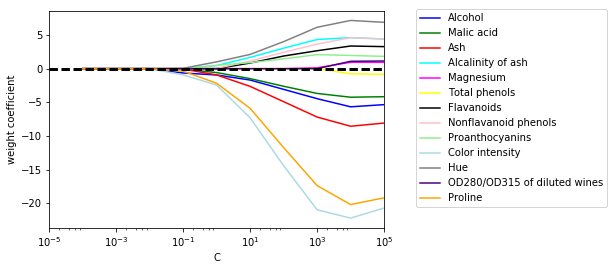

In [78]:
# behavior of L1 regularization

# features weight will be zero if we penalize with strong reuglarization parameter
# C = 1/ lambda

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column+1],
            color = color)
# horizontal line
plt.axhline(0, color='black', linestyle='--', linewidth=3)
# larger x axis
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()

# Sequential feature selection algorithm

Dimernsionality reduction
- reduce complexity
- avoid overfitting
- useful for unregularized model

Dimensionality reduction
- feature selection
  
  select a subset of original features
  
- feature extraction

  derive information from feature set to construct new feature subspace
  
Sequential feature selection algorithms 
- greedy search algo 
- reduce initial d-dimensional space to k-dimensional feature
- k < d

-automatically select a subset of features most relevant to the problem
-improve computational efficiency
- reduce generalization error by removing noise (useful for algo doesn't support regularization)

Sequential backward selection (SBS)
- reduce dimensionality with minimum decay in performance of classifier 
- improve computational efficiency
- improve predictive power if overfitting

Greedy algorithm
- make locally optimal choice at each stage of a combinatorial search problem
- generally yield a suboptimal solutoin to the problem in contrast to exhaustive search algorithm
- exhaustive search = computationally not feasible
- greedy = less complex, more efficient

# Idea behind SBS
removes features until new feature subspace contains desired number of feature

Use criterion function J that we want to minimize

J  = difference in performance of classifier after and before the removal of particular feature

1. k = d = full feature space X
2. featue x that maximizes criterion 
3. remove the feature x from the feature set
4. terminate if k = no. of desired features

In [96]:
# it is not implemented in sklearn
# simply removed the feature that is not contained in the best performing feature subset
from sklearn.base import clone
from itertools import combinations 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,  # k = desired no. of features
        scoring = accuracy_score, # performance of model
        test_size = 0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator) 
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X,y,test_size=self.test_size, random_state = self.random_state)
        # how many features
        dim = X_train.shape[1]
        # (0, 1, 2, 3, 4, 5)
        self.indices_ = tuple(range(dim))
        # [0, 1, 2, 3, 4, 5]
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                               X_test, y_test, self.indices_)
        # calculated the score J
        self.scores_ = [score]
        
        while dim > self.k_features: 
            # evaluate feature subset created by combinations
            # reduce until d = k
            scores = []
            subsets = []
            
            # p = different combinations of indices
            # p = different combination of features
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                        X_test, y_test, p)
            
                scores.append(score)
                subsets.append(p)
            # choose the maximum score and extract the features 
            best = np.argmax(scores)
            
            # choose the highest score in the subset feature
            self.indices_ = subsets[best]
            # append the feautre index to self.subset
            self.subsets_.append(self.indices_)
            dim -= 1
    
            # in each iteration, 
# the accuracy score of the best subset is collected in a list self 
            self.scores_.append(scores[best])
            
    # return a new data array with the selected feature columns
    def transform(self, X):
        return X[:, self_indices_]
    
    def _calc_score(self, X_train, y_train, 
                   X_test, y_test, indices):
        # fit the data into estimator
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [97]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features =1)
sbs.fit(X_train_std, y_train)

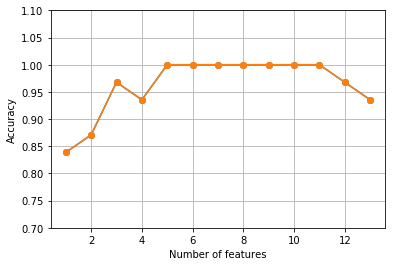

In [100]:
# SBS fit will create training subets for testing and training
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [102]:
k5 = list(sbs.subsets_[8])

In [103]:
print (df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [104]:
knn.fit(X_train_std, y_train)
print ('Training accuracy:', knn.score(X_train_std, y_train))
print ('Test accuracy', knn.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy', 0.94444444444444442)


In [106]:
# test accuracy improved 2 %
# reduced overfitting

knn.fit(X_train_std[:, k5], y_train)
print ('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print ('Test accuracy', knn.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.95967741935483875)
('Test accuracy', 0.96296296296296291)


# There are more feature selection in sklearn
- recursive backward elimination based on feature weight
- tree-based methods to select features by importance
- univariate statistical tests

# Assessing feature importance with random forests

－ L1 regularization to zero out irrelevant features
- SBS for feature selection

Random forest can measure feature importance as average impurity decrease from all trees without making assimption that our data is linearly separable or not

In [108]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
# n_jobs = multitask -1 = unlimited
# 10000 = 10000 trees
forest = RandomForestClassifier(n_estimators = 10000,
                               random_state = 0,
                               n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [109]:
indices = np.argsort(importances)[::-1]

In [113]:
# feature list
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f+1, 30, # index, spaces
                            feat_labels[f], # label
                            importances[indices[f]])) # importance of label

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


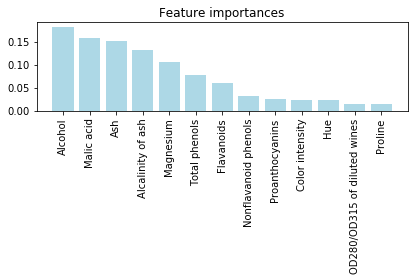

In [115]:
plt.title('Feature importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
# where the label marks
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# random forest technique comes with an important gotcha!
- if 2 or more features are highly correlated, feature may be ranked very highly while the information of other features may not be fully captured
- don't need to be conerned about this problem if only interested in performance rather than feature importance

In [119]:
# Transform select feature based on threshold after model fitting
X_selected = forest.transform(X_train, threshold = 0.15)
X_selected.shape

/Users/kachunfung/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)

In [120]:
# L1 avoid overfitting by reducing complexity of a model
# Sequential feature selection - select meaningful features